<a href="https://colab.research.google.com/github/Cliff12001/IMSE-441/blob/main/Lab_3_IMSE_541.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt
!pip install pingouin
import pingouin as pg
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

Q1) 4.35

In [129]:
data1 = {
    'Flow_125': [2.7, 2.6, 4.6, 3.2, 3.0, 3.8],
    'Flow_160': [4.6, 4.9, 5.0, 4.2, 3.6, 4.2],
    'Flow_200': [4.6, 2.9, 3.4, 3.5, 4.1, 5.1]
}

data1 = pd.DataFrame(data1)


In [50]:
df125 = pd.DataFrame([2.7,2.6,4.6,3.2,3.0,3.8])

In [51]:
df160=pd.DataFrame([4.6,4.9,5.0,4.2,3.6,4.2])

In [52]:
df200=pd.DataFrame([4.6,2.9,3.4,3.5,4.1,5.1])

a.)

In [53]:
p=f_oneway(df125,df160,df200)
p

F_onewayResult(statistic=array([3.58562691]), pvalue=array([0.05336513]))

C2F6 flow (SCCM) does not significantly affect etch uniformity, as well as the p-value being greater than 0.05 therefore we fail to reject the null hypothesis

b.)

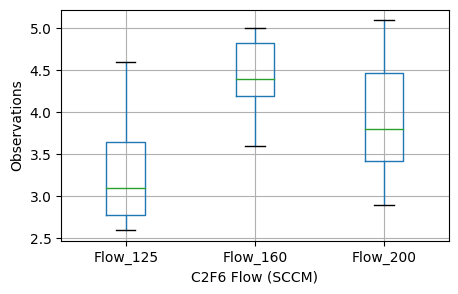

In [130]:
plt.figure(figsize=(5, 3))
data1.boxplot()
plt.ylabel('Observations')
plt.xlabel('C2F6 Flow (SCCM)')
plt.show()


Flow at 125 is the smallest uniformity

c.)

In [131]:
model = smf.ols(formula='df200 ~ df125 + df160', data=data1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

            sum_sq   df         F    PR(>F)
df125     0.108172  1.0  0.126838  0.745307
df160     0.800043  1.0  0.938099  0.404210
Residual  2.558503  3.0       NaN       NaN


In [109]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F)
df125,0.108172,1.0,0.108172,0.126838,0.745307
df160,0.800043,1.0,0.800043,0.938099,0.404210
Residual,2.558503,3.0,0.852834,NaN,NaN


In [110]:
predict=model.predict()
predict

array([3.66629311, 3.41034326, 3.72991936, 4.08057302, 4.51282169,
       4.20004956])

In [138]:
data1['residuals1'] = data1['Flow_125'] - data1['Flow_125'].mean()
data1['residuals2'] = data1['Flow_160'] - data1['Flow_160'].mean()
data1['residuals3'] = data1['Flow_200'] - data1['Flow_200'].mean()

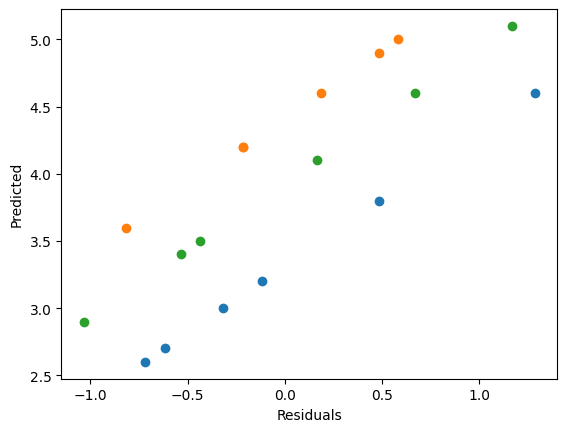

In [140]:
plt.scatter(data1['residuals1'], data1['Flow_125'])
plt.scatter(data1['residuals2'], data1['Flow_160'])
plt.scatter(data1['residuals3'], data1['Flow_200'])
plt.xlabel("Residuals")
plt.ylabel("Predicted")
plt.show()

d.)

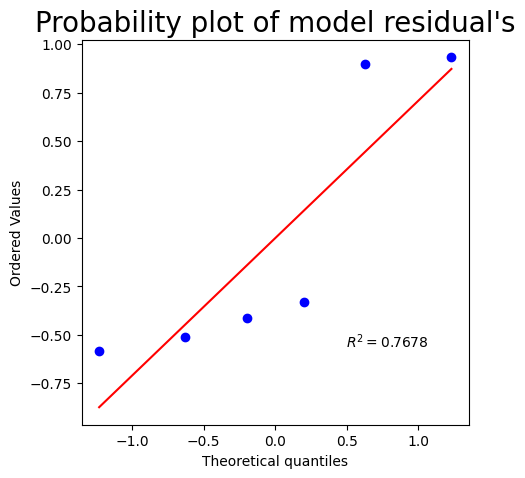

In [113]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

4.36

In [132]:
print(data1)

   Flow_125  Flow_160  Flow_200
0       2.7       4.6       4.6
1       2.6       4.9       2.9
2       4.6       5.0       3.4
3       3.2       4.2       3.5
4       3.0       3.6       4.1
5       3.8       4.2       5.1


In [135]:
comp = mc.MultiComparison(data1['Flow_125'], data1['Flow_160'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
3.6,4.2,0.5,0.8549,-13.1246,14.1246,False
3.6,4.6,-0.3,0.9742,-16.0323,15.4323,False
3.6,4.9,-0.4,0.94,-16.1323,15.3323,False
3.6,5.0,1.6,0.4519,-14.1323,17.3323,False
4.2,4.6,-0.8,0.6793,-14.4246,12.8246,False
4.2,4.9,-0.9,0.6292,-14.5246,12.7246,False
4.2,5.0,1.1,0.5442,-12.5246,14.7246,False
4.6,4.9,-0.1,0.9995,-15.8323,15.6323,False
4.6,5.0,1.9,0.3897,-13.8323,17.6323,False
4.9,5.0,2.0,0.3723,-13.7323,17.7323,False


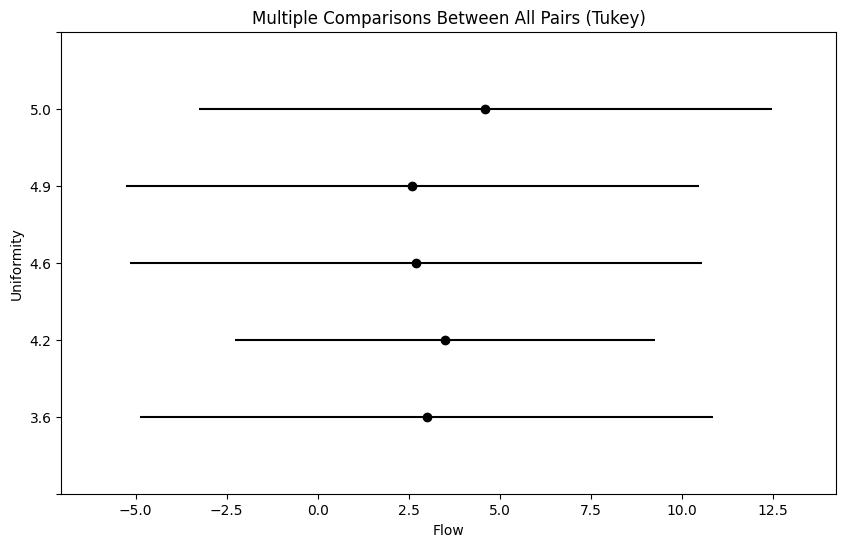

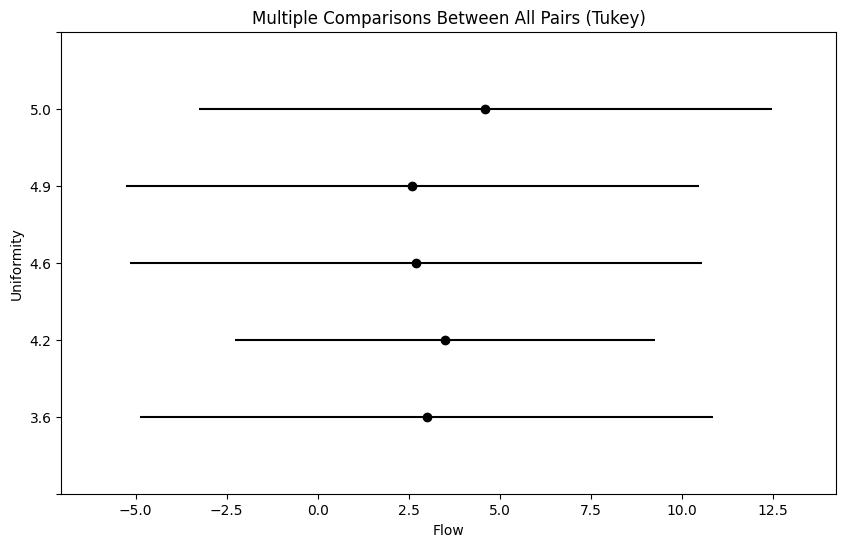

In [137]:
post_hoc_res.plot_simultaneous(ylabel= "Uniformity", xlabel= "Flow")

Q3) 4.47

In [42]:
Q3=pd.read_csv('/content/drive/MyDrive/4.47 data SQC.csv')
Q3

,Brake Horsepower,rpm,Road Octane Number,Compression
0,225,2000,90,100
1,212,1800,94,95
2,229,2400,88,110
3,222,1900,91,96
4,219,1600,86,100
5,278,2500,96,110
6,246,3000,94,98
7,237,3200,90,100
8,233,2800,88,105
9,224,3400,86,97


In [103]:
Q3.describe()

,Brake Horsepower,rpm,Road Octane Number,Compression
count,12.000000,12.000000,12.000000,12.000000
mean,231.500000,2408.333333,90.166667,101.250000
std,17.085347,599.178731,3.157483,5.011351
min,212.000000,1600.000000,86.000000,95.000000
25%,222.750000,1875.000000,88.000000,97.750000
50%,227.000000,2450.000000,90.000000,100.000000
75%,234.000000,2850.000000,91.750000,104.250000
max,278.000000,3400.000000,96.000000,110.000000


a.)

In [96]:
X = Q3[['rpm', 'Road Octane Number', 'Compression']]
X = sm.add_constant(X)  # Add a constant term (intercept)
y = Q3['Brake Horsepower']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Brake Horsepower   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Tue, 26 Sep 2023   Prob (F-statistic):            0.00317
Time:                        19:10:31   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -266.0312     92

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


b.)

In [86]:
import sklearn.linear_model as lm

In [87]:
model = lm.LinearRegression()
model.fit(X,y)

LinearRegression()

In [88]:
print('Coefficients: ', model.coef_)
print("y-intercept ", model.intercept_)

Coefficients:  [0.         0.01071321 3.13480626 1.86740943]
y-intercept  -266.03121172230476


In [90]:
r_sq = model.score(X, y)
r_sq

0.8065197565314594

In [89]:
y_pred = model.predict(X)
y_pred

array([224.26871063, 225.32824692, 240.95847559, 218.86255836,
       207.44420245, 267.10824644, 243.78632464, 237.12456005,
       235.90671156, 221.12574828, 222.12606905, 233.96014603])

In [94]:
from sklearn.metrics import explained_variance_score
print("mean square error: ", mean_squared_error(y,y_pred))
print("variance or r-squared: ", explained_variance_score(y, y_pred))

mean square error:  51.77208848145701
variance or r-squared:  0.8065197565314592


In [121]:
print(model.ssr)

2.5585031611094227


In [118]:
residual = y - y_pred
residual

0      0.731289
1    -13.328247
2    -11.958476
3      3.137442
4     11.555798
5     10.891754
6      2.213675
7     -0.124560
8     -2.906712
9      2.874252
10     0.873931
11    -3.960146
Name: Brake Horsepower, dtype: float64

In [119]:
sse = residual*residual
sse.sum()

621.2650617774841

Text(0.5, 1.0, 'OUR DATA')

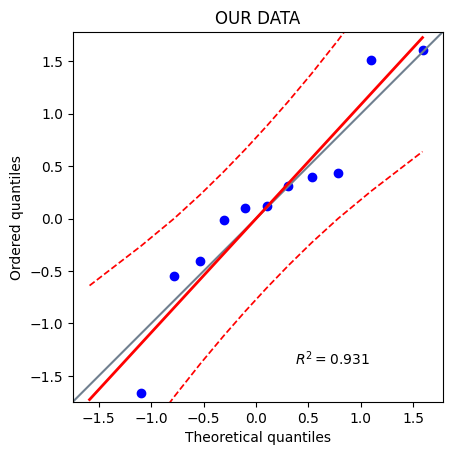

In [122]:
plt.show()
pg.qqplot(residual).set_title('OUR DATA')

c.)

From the model summary we can see the p-values for rpm, road octane, and compression at 0.044, 0.006, and 0.008. All three of these p-values are less than 0.05 therefore each of these contribute a lot to the regression model.